In [36]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def kl (p,q):
    resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
    return resalt

In [3]:
x = np.arange(-10,10.001,0.001)
len(x)
p = norm.pdf(x,0,2)
q = norm.pdf(x,2,3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


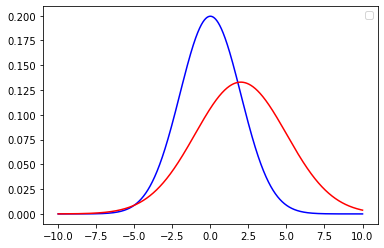

In [8]:
plt.plot(x,
         p,
         color='blue')

plt.plot(x,
         q,
         color='red')
plt.legend()
plt.show()

In [4]:
kl(p,q)

349.9134770311476

In [5]:
p = norm.pdf(x,0,2)
q = norm.pdf(x,0.1,1.98)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


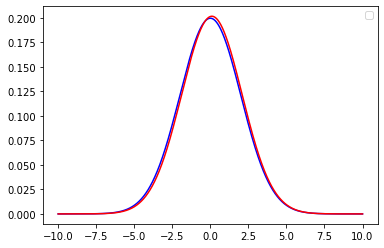

In [15]:
plt.plot(x,
         p,
         color='blue')

plt.plot(x,
         q,
         color='red')
plt.legend()
plt.show()


In [16]:
kl(p,q)

1.3769179737516406

In [6]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
data.groupby(data['Gender']).mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


In [8]:
males = data[data['Gender']=='Male']['Height']

In [9]:
len(males)

5000

In [10]:
males.describe()['mean']

69.02634590621737

<AxesSubplot:>

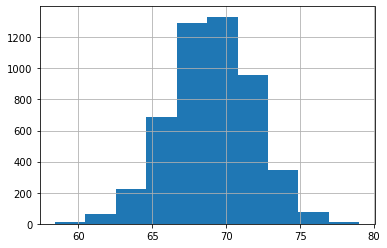

In [30]:
males.hist(bins=10)

In [11]:
males.describe()['std']

2.863362228660651

In [12]:
count, devision = np.histogram(males,
             bins=100)

In [13]:
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [14]:
len(devision)

101

In [15]:
ideal = norm.rvs(size=len(males),
                 loc=males.describe()['mean'],
                 scale=males.describe()['std'])

print(ideal)

[69.20909977 70.66529728 67.09009268 ... 69.80143524 68.86373387
 68.01735703]


In [16]:
kl(males,ideal)

657.5654256977662

In [17]:
icount, idevision = np.histogram(ideal,
                                 bins=100)

print(icount)
print(ideal)

[  1   0   0   1   1   1   0   4   2   3   6   5   7   7  10  11  10  12
  15  22  29  28  25  35  39  46  45  49  64  60  61  84  78  94  82 124
  94  96 126 112 133 135 138 140 143 149 152 154 139 117 128 125 150 144
 129 112 120  95 100 102 100  76  97  78  89  49  57  55  54  36  37  28
  23  12  24  12  11  12  16   5   2   5   6   3   4   4   1   3   0   1
   1   2   1   1   0   0   0   0   0   1]
[69.20909977 70.66529728 67.09009268 ... 69.80143524 68.86373387
 68.01735703]


In [18]:
kl(count,icount)

C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in log
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in multiply
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))


333.52394858876255

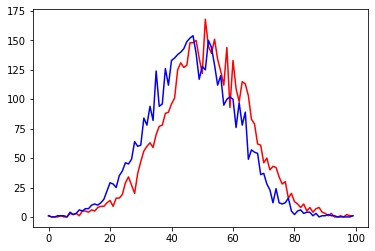

In [20]:
plt.plot(count,
         color='red')

plt.plot(icount,
         color='blue')

In [24]:
count = count / np.sum(count)
icount = icount / np.sum(icount)

In [25]:
kl(count,icount)

C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in log
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in multiply
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))


0.0667047897177525

In [23]:
np.sum(count)

1.0

In [26]:
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [29]:
data[data['Gender'] == 'Male'].mean()['Weight']

C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\778709580.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['Gender'] == 'Male'].mean()['Weight']


187.0206206581929

In [31]:
males_weight = data[data['Gender'] == 'Male'] ['Weight']

In [32]:
len(males_weight)

5000

In [42]:
countw, devisionw = np.histogram(males_weight,
                                 bins=100)

In [43]:
countw

array([  1,   0,   0,   1,   1,   1,   3,   0,   2,   1,   3,   2,   3,
         3,   9,   6,  10,  17,   9,   7,  16,  25,  17,  28,  22,  37,
        41,  46,  56,  55,  57,  75,  87,  86, 107,  94, 113, 113, 124,
       148, 149, 145, 132, 150, 147, 155, 161, 165, 168, 125, 167, 141,
       136, 149, 136, 139, 115, 125, 101, 110,  93,  92,  77,  66,  52,
        48,  53,  41,  38,  25,  30,  25,  20,  19,  15,  14,   8,   3,
         5,   4,   4,   8,   3,   0,   2,   1,   3,   2,   2,   2,   1,
         1,   0,   0,   0,   0,   0,   0,   0,   1], dtype=int64)

In [44]:
len(countw)

100

In [37]:
normw = stats.norm.rvs(size=len(males_weight),
                       loc = males_weight.describe()['mean'],
                       scale = males_weight.describe()['std'])

In [40]:
icountw, idevesionw = np.histogram(normw,
                                   bins=100)

In [41]:
len(icountw)

100

In [45]:
countw = countw / np.sum(countw)
icountw = icountw / np.sum(icountw)

In [46]:
kl(countw,icountw)

C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in true_divide
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: divide by zero encountered in log
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))
C:\Users\ali.gadgetman\AppData\Local\Temp\ipykernel_8860\2871390270.py:2: RuntimeWarning: invalid value encountered in multiply
  resalt = np.sum(np.where( np.logical_and(p != 0 , q != 0), p * np.log(p / q),0))


0.020081325773904233